<a href="https://colab.research.google.com/github/Muhammadridho100902/google_collab/blob/main/Flow_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

In [2]:
# ! chmod 600 /content/kaggle.json
# ! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d deepcontractor/car-price-prediction-challenge

In [3]:
# import zipfile
# zip_file = zipfile.ZipFile('/content/car-price-prediction-challenge.zip', 'r')
# zip_file.extractall('/content/')

In [4]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [5]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

x = df[['housing_median_age'	,'total_rooms'	,'total_bedrooms'	,'population'	,'households']]
y = df['median_house_value']

In [6]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
x = minmax.fit_transform(x)
x

array([[0.2745098 , 0.14788454, 0.19894475, 0.02836402, 0.07745437],
       [0.35294118, 0.20160801, 0.29484792, 0.03155918, 0.07597435],
       [0.31372549, 0.01892711, 0.02684668, 0.00924914, 0.01907581],
       ...,
       [0.31372549, 0.07051536, 0.08224705, 0.03478236, 0.07482322],
       [0.35294118, 0.07038355, 0.0855059 , 0.03629586, 0.07844105],
       [1.        , 0.04792408, 0.04639975, 0.02250624, 0.04423615]])

In [7]:
x = pd.DataFrame(x, columns=['housing_median_age'	,'total_rooms'	,'total_bedrooms'	,'population'	,'households'])
x.head()

,housing_median_age,total_rooms,total_bedrooms,population,households
0,0.274510,0.147885,0.198945,0.028364,0.077454
1,0.352941,0.201608,0.294848,0.031559,0.075974
2,0.313725,0.018927,0.026847,0.009249,0.019076
3,0.254902,0.039515,0.052142,0.014350,0.037000
4,0.372549,0.038276,0.050435,0.017405,0.042921


In [8]:
best_feature = SelectKBest(score_func=chi2, k=3)
fit = best_feature.fit(x,y)

In [9]:
df_score = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)

In [10]:
# gabung data diatas

featurescore = pd.concat([df_columns, df_score], axis =1)
featurescore.columns = ['specs', 'score']

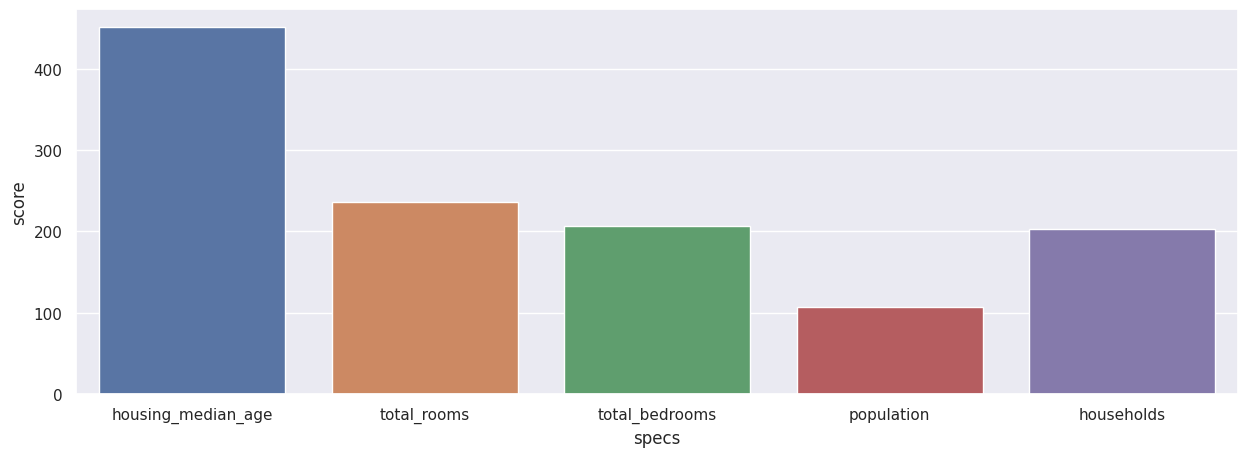

In [11]:
plt.figure(figsize=(15,5))
sns.barplot(featurescore, x='specs', y='score')
plt.show()

In [12]:
# x = x[['housing_median_age'	,'total_rooms'	,'total_bedrooms']]
# y = y['median_house_value']

KeyError: ignored

In [ ]:
x

In [13]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [14]:
x = df[['housing_median_age',	'total_rooms',	'total_bedrooms',	'population',	'households']]
y = df['median_house_value']

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler(feature_range=(0,1))
x_train_scaled = minmax.fit_transform(x_train)
x_test_scaled = minmax.fit_transform(x_test)

In [17]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train_scaled, y_train)

DecisionTreeRegressor()

In [18]:
feature_importance = model.feature_importances_
feature_importance

array([0.14215162, 0.26325589, 0.2242329 , 0.2356343 , 0.1347253 ])

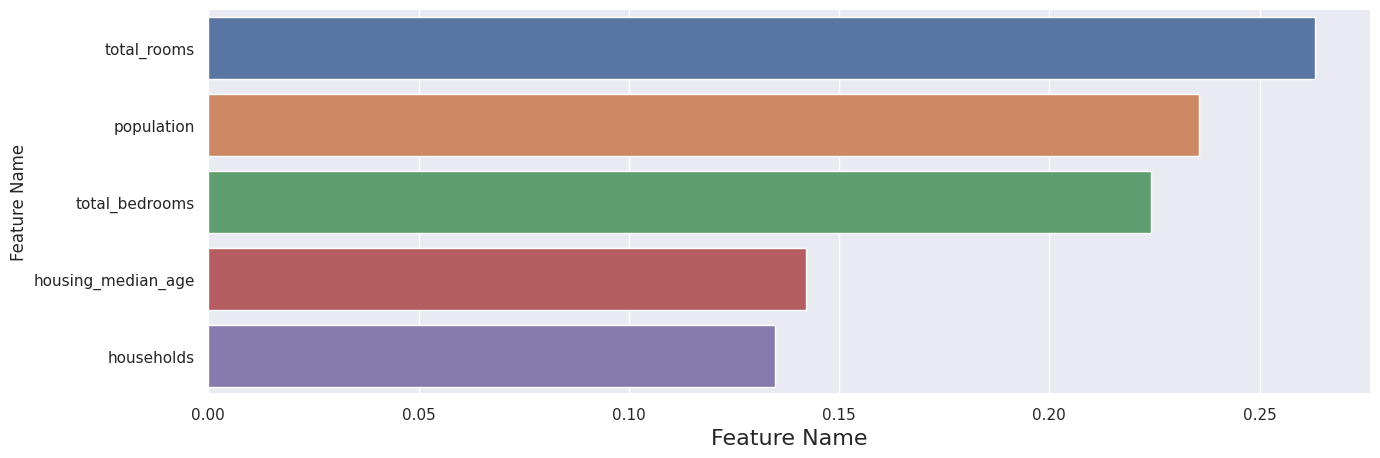

In [19]:
imp_df = pd.DataFrame({
    "Feature Name" : x_train.columns,
    "Importances" : model.feature_importances_
})

fi = imp_df.sort_values(by = 'Importances', ascending=False)

fi2 = fi.head()
plt.figure(figsize=(15,5))
sns.barplot(fi2, x='Importances', y='Feature Name')
plt.xlabel('Importance', fontsize=16)
plt.xlabel('Feature Name', fontsize=16)
plt.show()

In [25]:
example = np.array([[15.0, 5612.0,	1283.0,	1015.0,	472.0]])

y_pred = model.predict(example)
print(y_pred)

[225000.]
